# Project Specs

This project is based on a similar undertaking by Fathy Rashad, the creator of Text2Art.com. Based on my readings of the subject, the more easy to access, pretrained models in the Open Source community is the VQGAN and CLIP models. Since OpenAI has not released DALL-E in public, CLIP will be used here (as of 2021). As of 2023 however, DALL-E Mini is available to use without the need for a key. 

At this time, I have no idea what I'm doing - so I will be following Rashad's steps in deploying and serving the model; using Gradio and FastAPI to deploy and serve the models. 

As I understand, CLIP is a ranking model while VQGAN is the model that generates images based on prompts. CLIP ranks generated images by the prompts it received through tokenization. However, CLIP is not limited to run only with VQGAN, but can also be combined with other Open Source generators as well.

# Installing dependencies

In [ ]:
from IPython.utils import io
with io.capture_output() as captured:
  !rm -Rf pixray
  !git clone --recursive https://github.com/pixray/pixray
  !pip install -r pixray/requirements.txt
  !rm -Rf v-diffusion-pytorch
  !git clone https://github.com/pixray/v-diffusion-pytorch
  !git clone https://github.com/openai/CLIP
  !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

# ClipDraw (deprecated; replaced with Pixray) deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install gradio
  # not sure why this setup hack is necessary
  !cp -r v-diffusion-pytorch/diffusion pixray/.
  !pip uninstall -y tensorflow 
  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  !mkdir -p steps
  !mkdir -p models

  !pip freeze | grep torch
import os
if not os.path.isfile("first_init_complete"):
  !mkdir -p models
  os.mknod("first_init_complete")

In [ ]:
!pip install basicsr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 70.4 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214839 sha256=128098b21094879bd35edab9d18b34572907904df930e7a52661a533cddeb0c5
  Stored in directory: /root/.cache/pip/wheels/4d/d3/95/e17d0bcdd7dcfb0dbf79db006711e434c42036efbf6695ef7f
Successfully built basicsr
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
ERROR: pip's dependency resolver 

In [ ]:
!ls

CLIP		     models	  starting_image.png   v-diffusion-pytorch
diffvg		     outputs	  steps
first_init_complete  pixray	  taming
flagged		     sample_data  taming-transformers


# Code

In [ ]:
import sys

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/diffvg-0.0.1-py3.8-linux-x86_64.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
sys.path.append("pixray")

In [ ]:
'''
from IPython.utils import io
with io.capture_output() as captured:
  !rm -Rf pixray
  !git clone https://github.com/pixray/pixray
  !pip install -r pixray/requirements.txt
  !rm -Rf v-diffusion-pytorch
  !git clone https://github.com/pixray/v-diffusion-pytorch
  # not sure why this setup hack is necessary
  !cp -r v-diffusion-pytorch/diffusion pixray/.
  !pip uninstall -y tensorflow 
  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  !pip freeze | grep torch
import os
if not os.path.isfile("first_init_complete"):
  !mkdir -p models
  os.mknod("first_init_complete")
'''

In [ ]:
'''
import pixray

prompts = 'imperial battlecruiser'
quality = 'normal'
aspect = 'widescreen'
pixray.add_settings(prompts=prompts, quality=quality, aspect=aspect)
pixray.add_settings(iterations = 100, make_video=True, size=(800,400))
settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)
'''

## Gradio UI testing

In [ ]:
#!pip install -U pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.3.2
    Uninstalling Pillow-8.3.2:
      Successfully uninstalled Pillow-8.3.2


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://e219cd2b-4462-4b97.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Using seed: 10091418438493683305
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Loaded CLIP ViT-B/32: 224x224 and 151.28M params
Loaded CLIP ViT-B/16: 224x224 and 149.62M params
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['crimson skies']


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


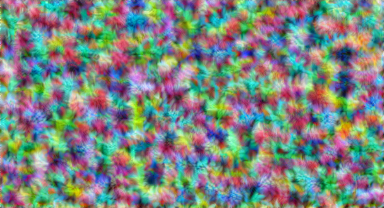

iter: 0, loss: 2, losses: 0.937, 0.0612, 0.933, 0.0642 (-0=>1.996)


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


iter: 10, loss: 1.87, losses: 0.877, 0.0591, 0.869, 0.0615 (-0=>1.866)


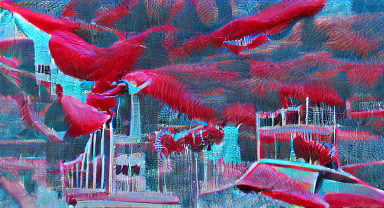

iter: 20, loss: 1.8, losses: 0.842, 0.06, 0.842, 0.0601 (-1=>1.799)
iter: 30, loss: 1.75, losses: 0.813, 0.0628, 0.81, 0.0619 (-0=>1.748)


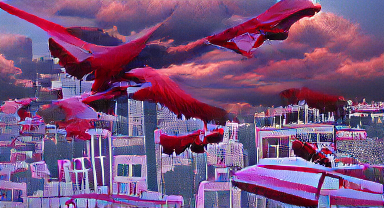

iter: 40, loss: 1.72, losses: 0.8, 0.0632, 0.794, 0.0618 (-1=>1.719)
iter: 50, loss: 1.7, losses: 0.784, 0.0647, 0.786, 0.0624 (-2=>1.693)


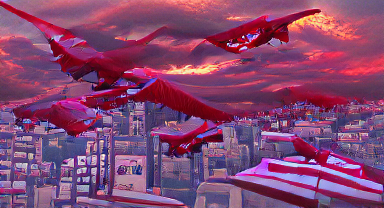

iter: 60, loss: 1.68, losses: 0.779, 0.0646, 0.769, 0.0648 (-0=>1.678)
iter: 70, loss: 1.67, losses: 0.778, 0.0639, 0.765, 0.0643 (-0=>1.672)


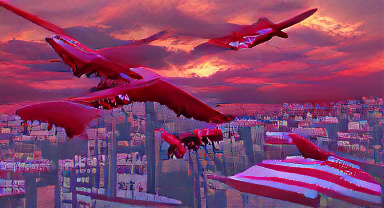

iter: 80, loss: 1.67, losses: 0.775, 0.0637, 0.765, 0.0645 (-1=>1.667)
iter: 90, loss: 1.67, losses: 0.773, 0.0642, 0.763, 0.0645 (-7=>1.659)


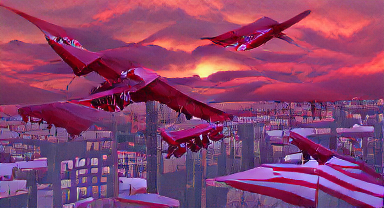

iter: 100, loss: 1.66, losses: 0.774, 0.0636, 0.762, 0.0647 (-6=>1.651)
iter: 110, loss: 1.65, losses: 0.769, 0.0655, 0.752, 0.0649 (-1=>1.648)


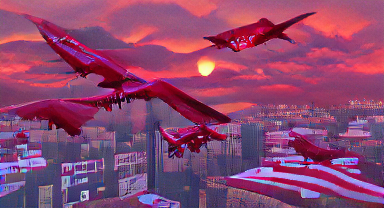

iter: 120, loss: 1.66, losses: 0.771, 0.0645, 0.755, 0.0657 (-11=>1.648)
iter: 130, loss: 1.65, losses: 0.773, 0.0643, 0.753, 0.0649 (-21=>1.648)


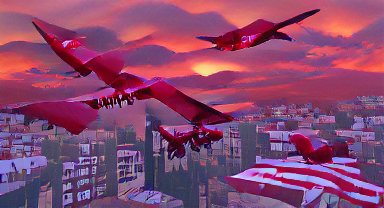

iter: 140, loss: 1.65, losses: 0.769, 0.064, 0.753, 0.0655 (-4=>1.643)
iter: 150, loss: 1.65, losses: 0.771, 0.0654, 0.746, 0.067 (-14=>1.643)


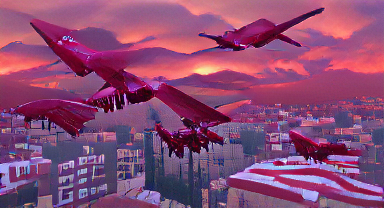

iter: 160, loss: 1.65, losses: 0.77, 0.0641, 0.754, 0.0649 (-24=>1.643)
iter: 170, loss: 1.64, losses: 0.765, 0.0655, 0.743, 0.0675 (-1=>1.638)


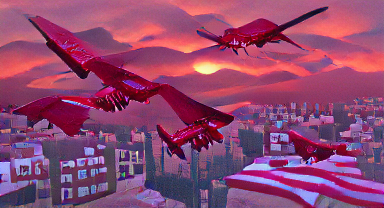

iter: 180, loss: 1.64, losses: 0.768, 0.0635, 0.747, 0.0667 (-6=>1.631)
Dropping learning rate
iter: 190, loss: 1.63, losses: 0.763, 0.0647, 0.739, 0.0666 (-0=>1.633)


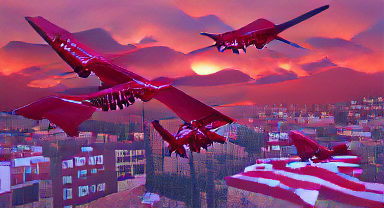

iter: 200, loss: 1.64, losses: 0.768, 0.0653, 0.739, 0.0686 (-6=>1.629)
iter: 210, loss: 1.63, losses: 0.763, 0.066, 0.735, 0.068 (-16=>1.629)


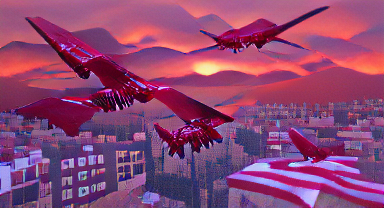

iter: 220, loss: 1.62, losses: 0.753, 0.0657, 0.728, 0.0697 (-0=>1.617)
iter: 230, loss: 1.64, losses: 0.766, 0.0653, 0.739, 0.0686 (-10=>1.617)


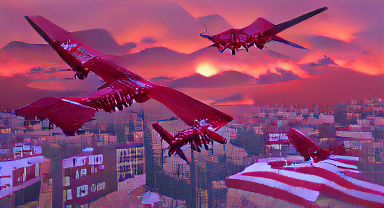

iter: 240, loss: 1.62, losses: 0.759, 0.0645, 0.731, 0.0674 (-20=>1.617)
iter: 250, finished (-30=>1.617)

Generating video...



Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e219cd2b-4462-4b97.gradio.live


In [ ]:
from IPython.core.display import Video
import gradio as gr
import torch
import pixray
import os

# main function
def generateImg(prompt, quality, aspect, drawer):
  torch.cuda.empty_cache()
  pixray.reset_settings()
  
  #imgInitialize = ""

  pixray.add_settings(prompts=prompt,
                      aspect=aspect,
                      quality=quality,
                      drawer=drawer,
                      make_video=True)
  pixray.add_settings(vector_prompts="textoff")
  #pixray.add_settings(init_image=img)
  #if imgInitialize == 'Yes':
    #pixray.add_settings(init_image=imgInitialize)
  settings = pixray.apply_settings()
  pixray.do_init(settings)
  pixray.do_run(settings)

  dirs = [d for d in os.listdir('/content/outputs') if os.path.isdir(os.path.join('/content/outputs', d))]
  dirs = sorted(dirs)

  return f'/content/outputs/{dirs[-1]}/output.png', f'/content/outputs/{dirs[-1]}/output.mp4'


# UI design
prompt = gr.components.Textbox(label='Enter subject')
quality = gr.components.Radio(choices=['draft', 'normal', 'better'], label= 'Quality')
aspect = gr.components.Radio(choices=['square', 'widescreen'], label='Size')
drawer = gr.components.Radio(choices=['vqgan', 'pixel'], label='Type')

# Launch
design = gr.Interface(generateImg, inputs=[prompt, quality, aspect, drawer], outputs=['image', 'video'], live=False)
design.launch(debug=True, enable_queue=True)

## Deployment

As the original author stated, Gradio is quite limited in its scope and can only use one function for its interface. Additionally, there isn't a way around having to use CSS and HTML to make your own website - so that leaves us with the fastest option of serving it as an API. 

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn aiofiles python-multipart firebase-admin

In [ ]:
## Serving model as a FAPI server
import pixray
import torch
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from fastapi import File, UploadFile, Form, BackgroundTasks
from fastapi.responses import FileResponse

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=['*'],
    allow_credentials=True,
    allow_methods=['*'],
    allow_headers=['*']
)

@app.get('/')
async def root():
  return {'Program': 'Init Complete'}

@app.post("/generate")
async def generate(
    seed: int = Form(None),
    iterations: int = Form(None),
    prompts: str = Form('City Skyline'),
    quality: str = Form('normal'),
    aspect: str = Form('widescreen'),
    drawer: str = Form('vqgan'),
    make_video: bool = Form(False)):
  torch.cuda.empty_cache()
  pixray.reset_settings()

  pixray.add_settings(prompts=prompts,
                      seed=seed,
                      aspect=aspect,
                      quality=quality,
                      drawer=drawer,
                      make_video=make_video)
  pixray.add_settings(vector_prompts="textoff")
  
  settings = pixray.apply_settings()
  pixray.do_init(settings)
  pixray.do_run(settings)

  dirs = [d for d in os.listdir('/content/outputs') if os.path.isdir(os.path.join('/content/outputs', d))]
  dirs = sorted(dirs)
  target = os.path.join('/content/outputs/',dirs[-1], 'output.png')

  return FileResponse(target, media_type="image/png")

In [ ]:
import getpass
from pyngrok import ngrok, conf

conf.get_default().auth_token = getpass.getpass()
connection_string = ngrok.connect(22, "tcp").public_url
ssh_url, port = connection_string.strip("tcp://").split(":")

··········


In [ ]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
print('Doc URL:', ngrok_tunnel.public_url+'/docs')
nest_asyncio.apply()
uvicorn.run(app, port=8000)